# Homework (20 pts) - Random Walk

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

---
## Continuous random walk in three dimensions

Write a program simulating a three-dimensional random walk in a continuous space. Let 1000 independent particles all start at random positions within a cube with corners at (0,0,0) and (1,1,1). At each time step each particle will move in a random direction by a random amount between -1 and 1 along each axis (x, y, z).

1. (4 pts) Write pseudocode for your 3-D continuous random walk program.

2. (3 pts) Translate your pseudocode into code. Run your program for 2000 time steps.

In [3]:
numParticles = 1000
numTimeSteps = 2000
particlePositions = np.zeros((numParticles, 3, numTimeSteps))

# starting positions
particlePositions[:,:,0] = np.random.random((numParticles, 3))

# random movement of each particle for each time step
randomMotions = np.random.random((numParticles, 3, numTimeSteps))
# convert random movements in [0,1] to [-1,1]
randomMotions *= 2  # [0,2]
randomMotions -= 1  # [-1,1]

# random walk
for t in range(1, numTimeSteps):
    particlePositions[:,:,t] = particlePositions[:,:,t-1] + randomMotions[:,:,t]

3. (3 pts) Generate a series of four 3-D scatter plots at selected time points to visually convey what is going on. Arrange the plots in a single row from left to right. Make sure you indicate which time points you are showing.

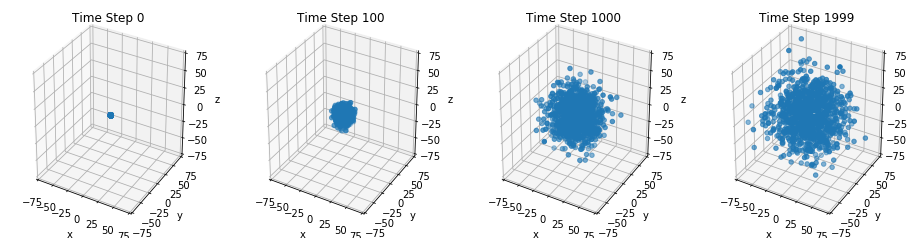

In [11]:
fig = plt.figure(figsize=(16,4))
for i, t in enumerate([0, 100, 1000, 1999]):
    x = particlePositions[:,0,t]
    y = particlePositions[:,1,t]
    z = particlePositions[:,2,t]
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f"Time Step {t}")
    ax.set_xlim([-75, 75])
    ax.set_ylim([-75, 75])
    ax.set_zlim([-75, 75]);

4. (3 pts) Draw the path of a single particle (your choice) across all time points on a 3-D plot.

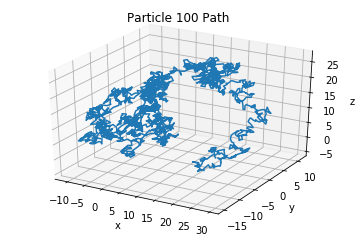

In [14]:
i = 100
x = particlePositions[i,0,:]
y = particlePositions[i,1,:]
z = particlePositions[i,2,:]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title(f"Particle {i} Path");

5. (4 pts) Find the minimum, maximum, mean and variance for the jump distances of all particles throughout the entire simulation. Jump distance is the euclidean distance moved on each time step $\sqrt(dx^2+dy^2+dz^2)$. *Hint: numpy makes this very simple.*

In [18]:
jumpDists = np.sqrt(((particlePositions[:,:,1:] - particlePositions[:,:,:-1])**2).sum(axis=1))

minJumpDist = jumpDists.min()
maxJumpDist = jumpDists.max()
meanJumpDist = jumpDists.mean()
jumpDistVar = jumpDists.var()

print(f"Minimum jump distance = {minJumpDist :.4f}")
print(f"Maximum jump distance = {maxJumpDist :.4f}")
print(f"Mean jump distance = {meanJumpDist :.4f}")
print(f"Jump distance variance = {jumpDistVar :.4f}")

Minimum jump distance = 0.0087
Maximum jump distance = 1.7262
Mean jump distance = 0.9604
Jump distance variance = 0.0772


6. (3 pts) Repeat the simulation, but this time confine the particles to a unit cell of dimension 10x10x10. Make it so that if a particle leaves one edge of the cell, it enters on the opposite edge (this is the sort of thing most molecular dynamics simulations do). Show plots as in #3 to visualize the simulation.

In [21]:
numParticles = 1000
numTimeSteps = 2000
particlePositions = np.zeros((numParticles, 3, numTimeSteps))

# starting positions
particlePositions[:,:,0] = np.random.random((numParticles, 3))

# random movement of each particle for each time step
randomMotions = np.random.random((numParticles, 3, numTimeSteps))
# convert random movements in [0,1] to [-1,1]
randomMotions *= 2  # [0,2]
randomMotions -= 1  # [-1,1]

# random walk
for t in range(1, numTimeSteps):
    particlePositions[:,:,t] = particlePositions[:,:,t-1] + randomMotions[:,:,t]
    for i in range(numParticles):
        x, y, z = particlePositions[i,:,t]
        if x < 0:
            particlePositions[i,0,t] += 10
        elif x > 10:
            particlePositions[i,0,t] -= 10
        if y < 0:
            particlePositions[i,1,t] += 10
        elif y > 10:
            particlePositions[i,1,t] -= 10
        if z < 0:
            particlePositions[i,2,t] += 10
        elif z > 10:
            particlePositions[i,2,t] -= 10

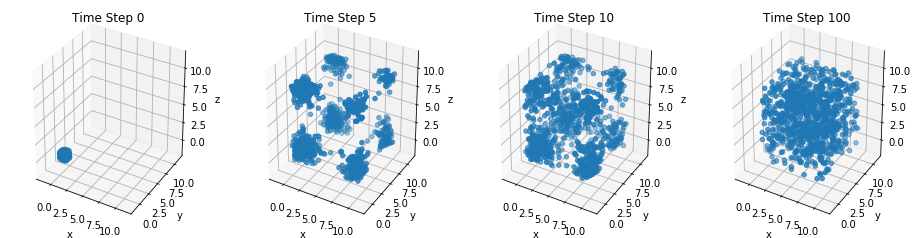

In [24]:
fig = plt.figure(figsize=(16,4))
for i, t in enumerate([0, 5, 10, 100]):
    x = particlePositions[:,0,t]
    y = particlePositions[:,1,t]
    z = particlePositions[:,2,t]
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f"Time Step {t}")
    ax.set_xlim([-2, 12])
    ax.set_ylim([-2, 12])
    ax.set_zlim([-2, 12]);